In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
from get_data import get_data
from train import train,score
import pandas as pd
import seaborn as sns
from tqdm.notebook import trange, tqdm
from model import LogisticRegression

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Device used = cuda


In [2]:
ns = [100,500,2000]
augs = [4,8,16,32,64]


Xt, Yt = get_data(type="dev")

length = len(ns)*len(augs)
data = {"n":[0]*length,
       "augs":[0]*length,
       "score":[0.0]*length,
       "vocab":[0]*length,
       "runs":[0]*length}
df = pd.DataFrame(data)

i = 0
for n in tqdm(ns):
    
    X,Y = get_data(f"n_{n}",early_return=False)
    model = LogisticRegression(max_iter=100)
    model.fit(X,Y)
    preds = model.predict(Xt)
    acc = round((sum(preds == Yt)/len(Yt)), 3)
    df.at[i,"n"] = n
    df.at[i,"score"] = acc
    df.at[i,"vocab"] = len(model[0].vocab)
    i+=1
    for aug in augs:
        #print(f"\neda_augs_{aug}_n_{n}")
        X,Y = get_data(type=f"eda_augs_{aug}_n_{n}")
        model = LogisticRegression(max_iter=100)
        model.fit(X,Y)
        preds = model.predict(Xt)
        acc = round((sum(preds == Yt)/len(Yt)), 3)
        df.at[i,"n"] = n
        df.at[i, "augs"] = aug
        df.at[i,"score"] = acc
        df.at[i,"vocab"] = len(model[0].vocab)
        i+=1

  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Johan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Johan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [3]:
df

,n,augs,score,vocab,runs
0,100.0,0.0,0.592,13.0,0.0
1,100.0,4.0,0.639,114.0,0.0
2,100.0,8.0,0.647,210.0,0.0
3,100.0,16.0,0.657,351.0,0.0
4,100.0,32.0,0.663,1238.0,0.0
5,100.0,64.0,0.659,1256.0,0.0
6,500.0,0.0,0.699,112.0,0.0
7,500.0,4.0,0.742,532.0,0.0
8,500.0,8.0,0.752,841.0,0.0
9,500.0,16.0,0.758,1381.0,0.0


In [4]:
preds = model.predict(Xt)
round((sum(preds == Yt)/len(Yt)), 3)

0.817

In [5]:
df.to_csv("EDA_results_LR.csv")

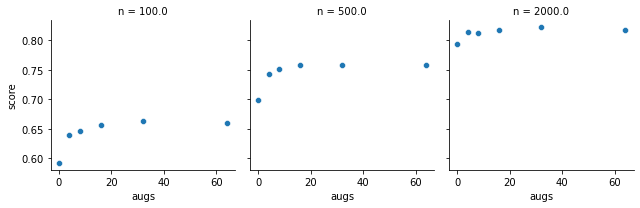

In [6]:
g = sns.FacetGrid(df,col="n")
g.map(sns.scatterplot,"augs","score")